In [2]:
import json

In [9]:
with open('../Resources/observation_to_sentiment_and_line.json') as f:
    data = json.load(f)

In [10]:
from collections import Counter
ignore_sentiment_ct = Counter()
positive_ct = Counter()
neutral_ct = Counter()
negative_ct = Counter()

In [11]:
for line, metadata in data.items():
    polarity = metadata[0][:4]
    for x in metadata[1:]:
        ignore_sentiment_ct[x] += 1
        if polarity == 'POSI':
            positive_ct[x] += 1
        elif polarity == 'NEGA':
            negative_ct[x] += 1
        else:
            assert polarity == 'NEUT'
            neutral_ct[x] += 1

In [12]:
import matplotlib.pyplot as plt
def plot_ct(ct, title=None):
    plt.figure(figsize=(10, 10))
    if title is not None:
        plt.title(title)
    d = dict(ct)
    keys = list(sorted(d.keys(), key=lambda x: -ct[x]))
    vals = [d[x] for x in keys]
    plt.pie(vals, labels=keys)

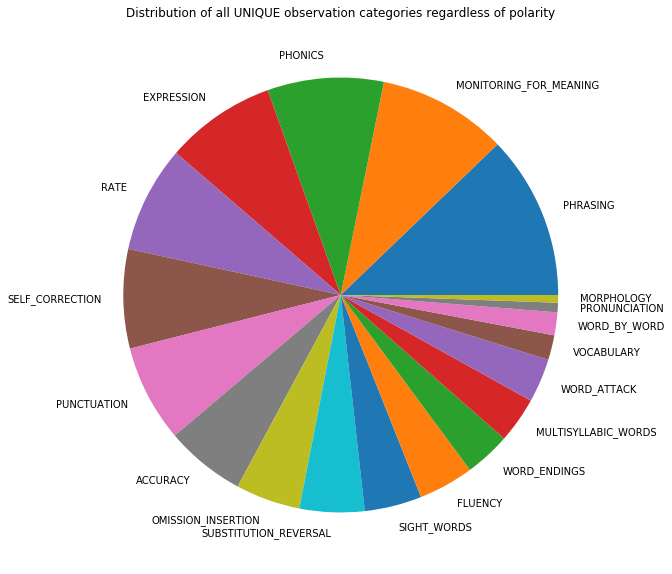

In [13]:
plot_ct(ignore_sentiment_ct, title='Distribution of all UNIQUE observation categories regardless of polarity')

In [14]:
dict(ignore_sentiment_ct).keys()

dict_keys(['PHONICS', 'OMISSION_INSERTION', 'MONITORING_FOR_MEANING', 'ACCURACY', 'SUBSTITUTION_REVERSAL', 'EXPRESSION', 'WORD_ATTACK', 'PUNCTUATION', 'SIGHT_WORDS', 'VOCABULARY', 'FLUENCY', 'WORD_ENDINGS', 'MULTISYLLABIC_WORDS', 'MORPHOLOGY', 'SELF_CORRECTION', 'PRONUNCIATION', 'RATE', 'PHRASING', 'WORD_BY_WORD'])

In [15]:
with open('../COMPLETE_READINGS.json') as f:
    readings = json.load(f)

In [16]:
totals = []
for ex in readings:
    for ev in ex['Evaluations']:
        for obs in ev['Observations']:
            totals.append(data[obs])

In [17]:
total_ct = Counter()
pos_ct = Counter()
neg_ct = Counter()
neut_ct = Counter()
for x in totals:
    polarity = x[0][:4]
    for cat in x[1:]:
        total_ct[cat] += 1
        if polarity == 'POSI':
            pos_ct[cat] += 1
        if polarity == 'NEGA':
            neg_ct[cat] += 1
        if polarity == 'NEUT':
            neut_ct[cat] += 1

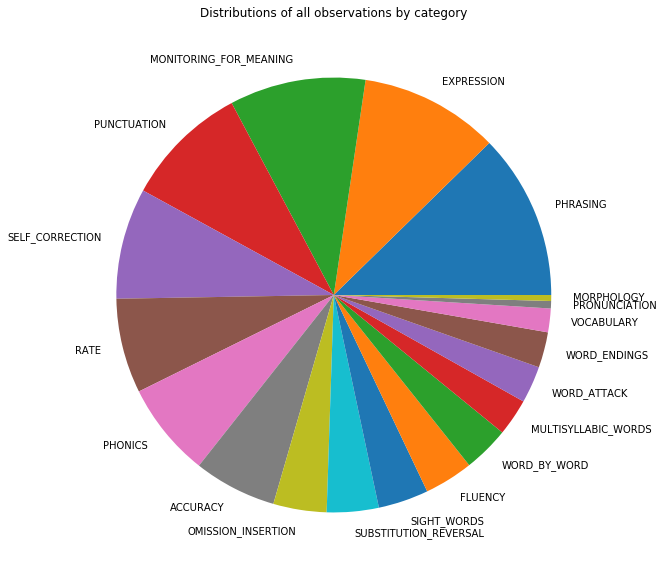

In [18]:
plot_ct(total_ct, title='Distributions of all observations by category')

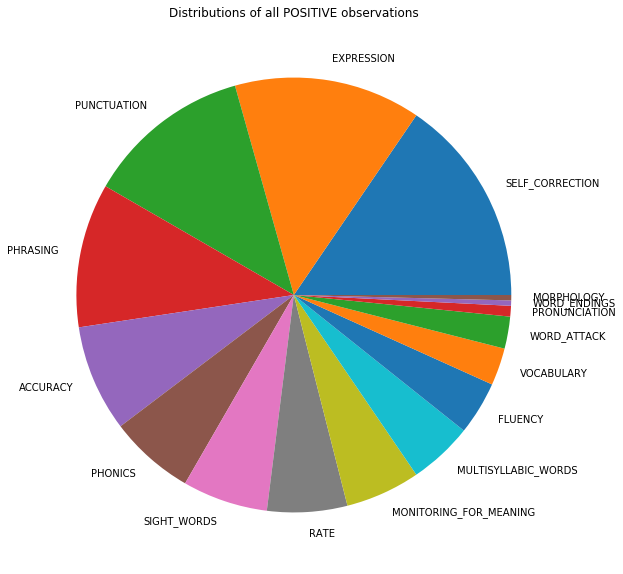

In [19]:
plot_ct(pos_ct, title='Distributions of all POSITIVE observations')

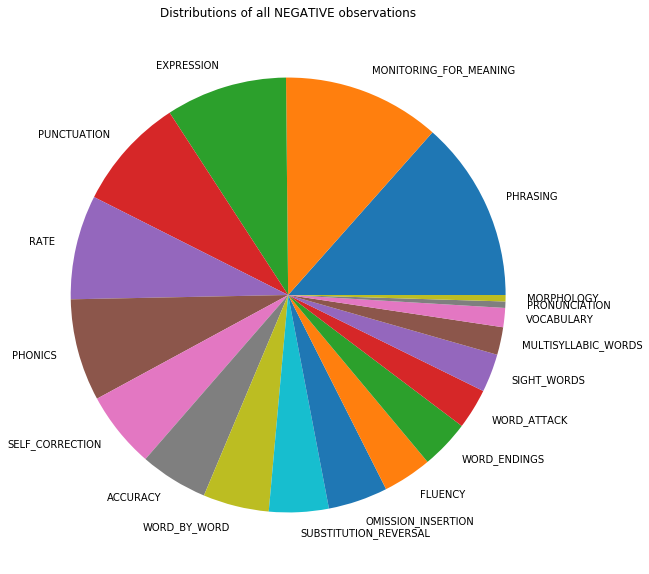

In [20]:
plot_ct(neg_ct, title='Distributions of all NEGATIVE observations')

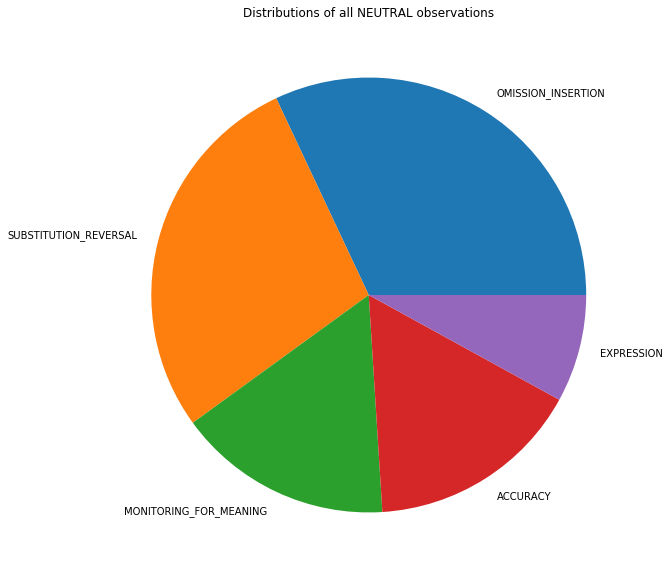

In [21]:
plot_ct(neut_ct, title='Distributions of all NEUTRAL observations')

In [22]:
categories = list(dict(total_ct).keys())
with open('../Resources/all_categories_to_counts.tsv', 'w') as f:
    for cat in categories:
        total_count = total_ct[cat]
        pos_count = 0
        neg_count = 0
        neut_count = 0
        if cat in pos_ct:
            pos_count = pos_ct[cat]
        if cat in neg_ct:
            neg_count = neg_ct[cat]
        if cat in neut_ct:
            neut_count = neut_ct[cat]
        print('{}\t{}\t{}\t{}\t{}'.format(
            cat,
            total_count,
            pos_count,
            neg_count,
            neut_count
        ), file=f)